In [139]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
output = "/home/eda/Desktop/DeepSimpson/deepsimpson/output/features"
simpsons_df = pd.read_csv("/home/eda/Desktop/DeepSimpson/deepsimpson/output/features/simpsons.csv")

##### Filter the DataFrame to include only rows where the type is "major axis"

In [141]:
simpsons_df_filtered = simpsons_df[simpsons_df["Type"] == "Major Axis"]
simpsons_df_filtered.head()

,Filename,Phase,Frame,Start_X,Start_Y,End_X,End_Y,Frames,Type,Split,Length,EF
0,0X1002E8FBACD08477.avi,ED_GT,3,50.0,24.0,70.337857,70.483664,1.0,Major Axis,train,50.738146,59.101988
21,0X1002E8FBACD08477.avi,ALL,4,51.0,24.0,69.633596,69.847133,2.0,Major Axis,train,49.489095,59.101988
42,0X1002E8FBACD08477.avi,ALL,5,50.0,25.0,69.896630,69.629843,3.0,Major Axis,train,48.864085,59.101988
63,0X1002E8FBACD08477.avi,ALL,6,51.0,25.0,69.485391,69.250933,4.0,Major Axis,train,47.956801,59.101988
84,0X1002E8FBACD08477.avi,ALL,7,51.0,25.0,69.383963,69.248900,5.0,Major Axis,train,47.915919,59.101988


##### For each video, select the last row based on the order in the DataFrame

In [142]:
last_rows_df = simpsons_df_filtered.groupby("Filename").tail(1)
last_rows_df.head()

,Filename,Phase,Frame,Start_X,Start_Y,End_X,End_Y,Frames,Type,Split,Length,EF
315,0X1002E8FBACD08477.avi,ES_GT,18,52.0,26.0,68.022217,64.316461,16.0,Major Axis,train,41.531466,59.101988
566,0X1005D03EED19C65B.avi,ES_GT,35,60.0,20.0,79.586056,57.173942,12.0,Major Axis,train,42.018038,62.363798
943,0X10075961BC11C88E.avi,ES_GT,108,57.0,26.0,62.066410,67.891161,18.0,Major Axis,train,42.196421,54.545097
1237,0X100E3B8D3280BEC5.avi,ES_GT,38,60.0,25.0,72.858335,72.282675,14.0,Major Axis,train,48.999879,36.573739
1804,0X100E491B3CD58DE2.avi,ES_GT,75,49.0,19.0,67.844298,64.690218,27.0,Major Axis,train,49.423715,33.991745


Max frame: 221.0
Min frame: 2.0
Mean frame: 17.751795690343176


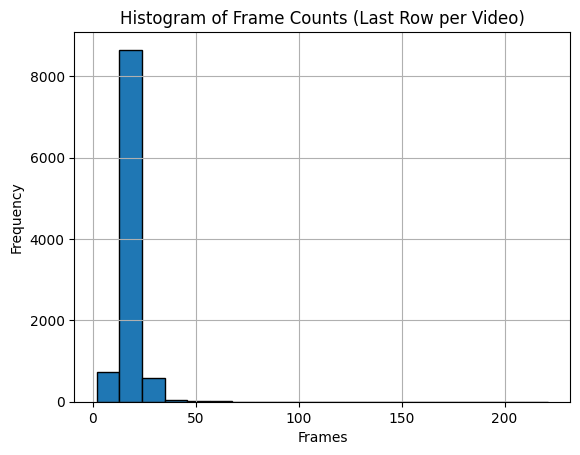

In [143]:
# Display basic statistics of the "Frames" column
print("Max frame:", last_rows_df["Frames"].max())
print("Min frame:", last_rows_df["Frames"].min())
print("Mean frame:", last_rows_df["Frames"].mean())

# Plot a histogram of the "Frames" column


plt.hist(last_rows_df["Frames"], bins=20, edgecolor='black')
plt.title("Histogram of Frame Counts (Last Row per Video)")
plt.xlabel("Frames")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [144]:
# Find the row with the maximum frame count
max_frame_row = last_rows_df.loc[last_rows_df["Frames"].idxmax()]
print("Split of video with max frames:", max_frame_row["Split"])

# Find the row with the minimum frame count
min_frame_row = last_rows_df.loc[last_rows_df["Frames"].idxmin()]
print("Split of video with min frames:", min_frame_row["Split"])


Split of video with max frames: val
Split of video with min frames: train


In [145]:
# Count how many videos have more than 30 frames
num_videos_over_30 = (last_rows_df["Frames"] > 30).sum()
print("Number of videos with more than 30 frames:", num_videos_over_30)



Number of videos with more than 30 frames: 114


In [146]:
def get_fixed_sequence(df, seq_len=20):
    """
    Given a DataFrame containing frames for one video, return exactly `seq_len` frames.
    Assumes `df` is already sorted by frame index.
    """
    total_frames = len(df)
    
    if total_frames >= seq_len:
        # Always keep first and last frames
        first_frame = df.iloc[0:1]
        last_frame = df.iloc[-1:]

        # Sample (seq_len - 2) frames uniformly from the middle
        middle_frames = df.iloc[1:-1]
        sampled = middle_frames.sample(n=seq_len - 2, random_state=42) if len(middle_frames) >= (seq_len - 2) else middle_frames
        sampled = sampled.sort_values(by="Frame")  # Keep time order
        
        result = pd.concat([first_frame, sampled, last_frame])
    else:
        # Pad by repeating some frames to reach seq_len
        # e.g., repeat frames randomly or with interpolation logic
        padding_needed = seq_len - total_frames
        pad_indices = np.random.choice(total_frames, padding_needed, replace=True)
        pad_rows = df.iloc[pad_indices]

        result = pd.concat([df, pad_rows])
        result = result.sort_values(by="Frame")
    
    return result

# Apply this logic to each video
fixed_sequence_df = simpsons_df_filtered.groupby("Filename").apply(lambda group: get_fixed_sequence(group, seq_len=20))

# Reset index if needed
fixed_sequence_df = fixed_sequence_df.reset_index(drop=True)

/tmp/ipykernel_1504962/516459962.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fixed_sequence_df = simpsons_df_filtered.groupby("Filename").apply(lambda group: get_fixed_sequence(group, seq_len=20))


In [147]:
fixed_sequence_df.head(25)

,Filename,Phase,Frame,Start_X,Start_Y,End_X,End_Y,Frames,Type,Split,Length,EF
0,0X100009310A3BD7FC.avi,ED_GT,46,59.0,18.0,69.752544,66.758197,1.0,Major Axis,val,49.929740,78.498406
1,0X100009310A3BD7FC.avi,ALL,47,56.0,19.0,68.878959,66.595126,2.0,Major Axis,val,49.306832,78.498406
2,0X100009310A3BD7FC.avi,ALL,48,59.0,18.0,67.529014,66.564441,3.0,Major Axis,val,49.307698,78.498406
3,0X100009310A3BD7FC.avi,ALL,49,57.0,18.0,67.023560,66.202035,4.0,Major Axis,val,49.233200,78.498406
4,0X100009310A3BD7FC.avi,ALL,50,58.0,17.0,66.932618,66.729890,5.0,Major Axis,val,50.525772,78.498406
5,0X100009310A3BD7FC.avi,ALL,51,59.0,17.0,66.858121,66.564310,6.0,Major Axis,val,50.183372,78.498406
6,0X100009310A3BD7FC.avi,ALL,52,58.0,17.0,66.089849,63.438959,7.0,Major Axis,val,47.138334,78.498406
7,0X100009310A3BD7FC.avi,ALL,52,58.0,17.0,66.089849,63.438959,7.0,Major Axis,val,47.138334,78.498406
8,0X100009310A3BD7FC.avi,ALL,52,58.0,17.0,66.089849,63.438959,7.0,Major Axis,val,47.138334,78.498406
9,0X100009310A3BD7FC.avi,ALL,53,59.0,18.0,65.514934,63.558242,8.0,Major Axis,val,46.021710,78.498406


In [150]:
# Step 1: Filter the rows
simpson_discs_df = simpsons_df[simpsons_df["Type"] == "Simpson's Disc"]

# Step 2: Preprocess Simpson's Disc rows into a group lookup
grouped_discs = simpson_discs_df.groupby(["Filename", "Frame"])

# Step 3: Prepare the final row list
ordered_rows = []

# Step 4: For each Major Axis row, add it and its matching discs in order
for _, major_row in fixed_sequence_df.iterrows():
    ordered_rows.append(major_row.to_dict())  # Convert major_row to dict

    # Create the lookup key
    key = (major_row["Filename"], major_row["Frame"])

    # If there are matching Simpson's Discs, add them
    if key in grouped_discs.groups:
        matching_discs = grouped_discs.get_group(key)
        ordered_rows.extend(matching_discs.to_dict('records'))  # Already dict

# Step 5: Convert back to DataFrame
final_df = pd.DataFrame(ordered_rows).reset_index(drop=True)


In [151]:
# Convert the list of rows back to a DataFrame
final_df.head()

,Filename,Phase,Frame,Start_X,Start_Y,End_X,End_Y,Frames,Type,Split,Length,EF
0,0X100009310A3BD7FC.avi,ED_GT,46,59.000000,18.000000,69.752544,66.758197,1.0,Major Axis,val,49.929740,78.498406
1,0X100009310A3BD7FC.avi,ED_GT,46,59.497533,17.890280,51.537011,19.645798,NaN,Simpson's Disc,val,8.151794,78.498406
2,0X100009310A3BD7FC.avi,ED_GT,46,61.058521,20.237061,50.112804,22.650898,NaN,Simpson's Disc,val,11.208717,78.498406
3,0X100009310A3BD7FC.avi,ED_GT,46,62.619510,22.583843,48.688597,25.655998,NaN,Simpson's Disc,val,14.265640,78.498406
4,0X100009310A3BD7FC.avi,ED_GT,46,65.175564,24.711184,49.254520,28.222219,NaN,Simpson's Disc,val,16.303589,78.498406


In [152]:
import os 
output_path = os.path.join(output, "fixed_frame.csv")
# Save as csv
final_df.to_csv(output_path, index=False)

In [155]:
# Count the number of Major Axis rows per video
major_axis_counts = final_df[final_df["Type"] == "Major Axis"].groupby("Filename").size().reset_index(name="MajorAxisCount")

# Show the first few rows
print(major_axis_counts.head(100))




                  Filename  MajorAxisCount
0   0X100009310A3BD7FC.avi              20
1   0X1002E8FBACD08477.avi              20
2   0X1005D03EED19C65B.avi              20
3   0X10075961BC11C88E.avi              20
4   0X10094BA0A028EAC3.avi              20
..                     ...             ...
95  0X10FCACE551DE0CEB.avi              20
96  0X11000DD0D10B399F.avi              20
97  0X1100A0AA0BDBAE92.avi              20
98  0X1106795368C7DE44.avi              20
99  0X1108EED6EC60971E.avi              20

[100 rows x 2 columns]
